<a href="https://colab.research.google.com/github/rajat10-01/Stock-analysis/blob/master/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=d74be822a976372a69b1ae83012b19ed1c2ffb851d5e5fe83d23a8613de28759
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
from pandas_datareader import data
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
today = date.today()

In [0]:
start_date = "2014-04-20"
end_date   = today

In [0]:
df = yf.download("HDFCBANK.BO", start=start_date, end = end_date)
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

[*********************100%***********************]  1 of 1 completed


In [0]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-21,360.549988,363.524994,356.524994,358.299988,329.808380,212332
2014-04-22,360.174988,364.325012,359.250000,363.174988,334.295715,757510
2014-04-23,363.250000,369.524994,361.750000,367.125000,337.931580,476794
2014-04-24,367.125000,367.125000,367.125000,367.125000,337.931580,0
2014-04-25,366.500000,368.750000,362.500000,363.125000,334.249695,395336


In [0]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1.474000e+03
mean,786.044095,791.869327,778.386167,785.094633,766.240073,3.292679e+05
std,275.392459,277.066986,272.591813,274.634405,283.820768,6.238164e+05
min,357.500000,361.424988,356.000000,357.950012,329.486145,0.000000e+00
25%,532.100006,536.012497,526.656250,531.306229,502.602829,1.093905e+05
50%,733.700012,744.500000,726.274994,740.125000,715.030853,1.743560e+05
75%,1031.875000,1039.209961,1020.327484,1029.364990,1020.916367,3.277690e+05
max,1302.750000,1304.099976,1289.349976,1302.300049,1302.300049,1.104901e+07


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1474 entries, 2014-04-21 to 2020-04-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1474 non-null   float64
 1   High       1474 non-null   float64
 2   Low        1474 non-null   float64
 3   Close      1474 non-null   float64
 4   Adj Close  1474 non-null   float64
 5   Volume     1474 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 80.6 KB


In [0]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-16,863.000000,889.599976,856.099976,881.049988,881.049988,806676
2020-04-17,912.849976,920.849976,887.900024,910.400024,910.400024,2840770
2020-04-20,952.250000,960.849976,936.099976,946.000000,946.000000,2003508
2020-04-21,928.000000,934.349976,908.200012,920.750000,920.750000,613947
2020-04-22,918.000000,932.650024,907.299988,928.400024,928.400024,429763


In [0]:
close = df['Close']
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
close = close.reindex(all_weekdays)
close = close.fillna(method='ffill')

In [0]:
print(all_weekdays)

DatetimeIndex(['2014-04-21', '2014-04-22', '2014-04-23', '2014-04-24',
               '2014-04-25', '2014-04-28', '2014-04-29', '2014-04-30',
               '2014-05-01', '2014-05-02',
               ...
               '2020-04-10', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23'],
              dtype='datetime64[ns]', length=1569, freq='B')


In [0]:
close.head(10)

2014-04-21    358.299988
2014-04-22    363.174988
2014-04-23    367.125000
2014-04-24    367.125000
2014-04-25    363.125000
2014-04-28    362.649994
2014-04-29    357.950012
2014-04-30    359.125000
2014-05-01    359.125000
2014-05-02    358.424988
Freq: B, Name: Close, dtype: float64

In [0]:
close.describe()

count    1569.000000
mean      785.471850
std       274.613563
min       357.950012
25%       530.900024
50%       748.375000
75%      1029.469971
max      1302.300049
Name: Close, dtype: float64

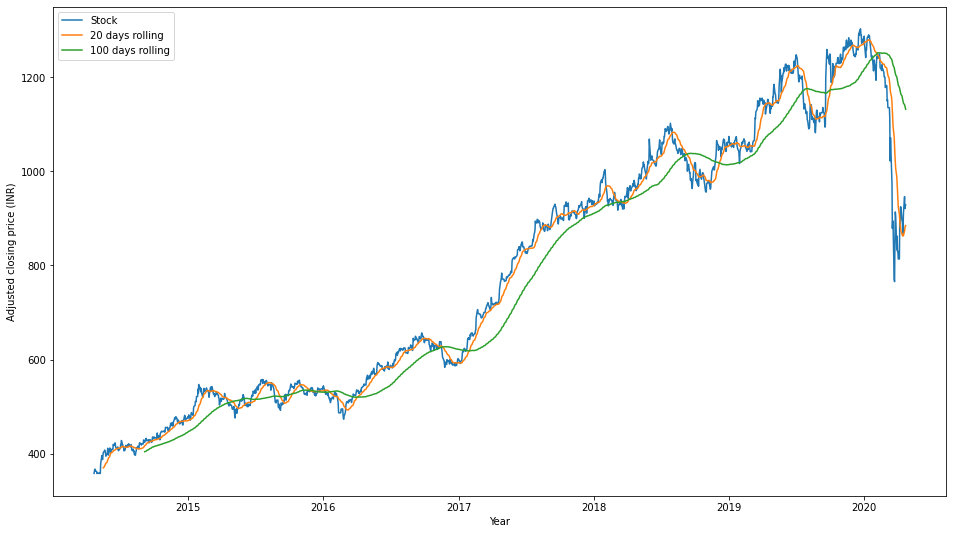

In [0]:
# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling = close.rolling(window=20).mean()
long_rolling  = close.rolling(window=100).mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label='Stock')
ax.plot(short_rolling.index, short_rolling, label='20 days rolling')
ax.plot(long_rolling.index, long_rolling, label='100 days rolling')

ax.set_xlabel('Year')
ax.set_ylabel('Adjusted closing price (INR)')
ax.legend()

In [0]:
short_rolling.tail()

2020-04-17    863.552502
2020-04-20    872.327502
2020-04-21    880.092502
2020-04-22    883.735004
2020-04-23    884.485004
Freq: B, Name: Close, dtype: float64

In [0]:
# Relative returns
returns = close.pct_change(1)
returns.head()

2014-04-21         NaN
2014-04-22    0.013606
2014-04-23    0.010876
2014-04-24    0.000000
2014-04-25   -0.010895
Freq: B, Name: Close, dtype: float64

In [0]:
# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(close).diff()
log_returns.head()

2014-04-21         NaN
2014-04-22    0.013514
2014-04-23    0.010818
2014-04-24    0.000000
2014-04-25   -0.010955
Freq: B, Name: Close, dtype: float64

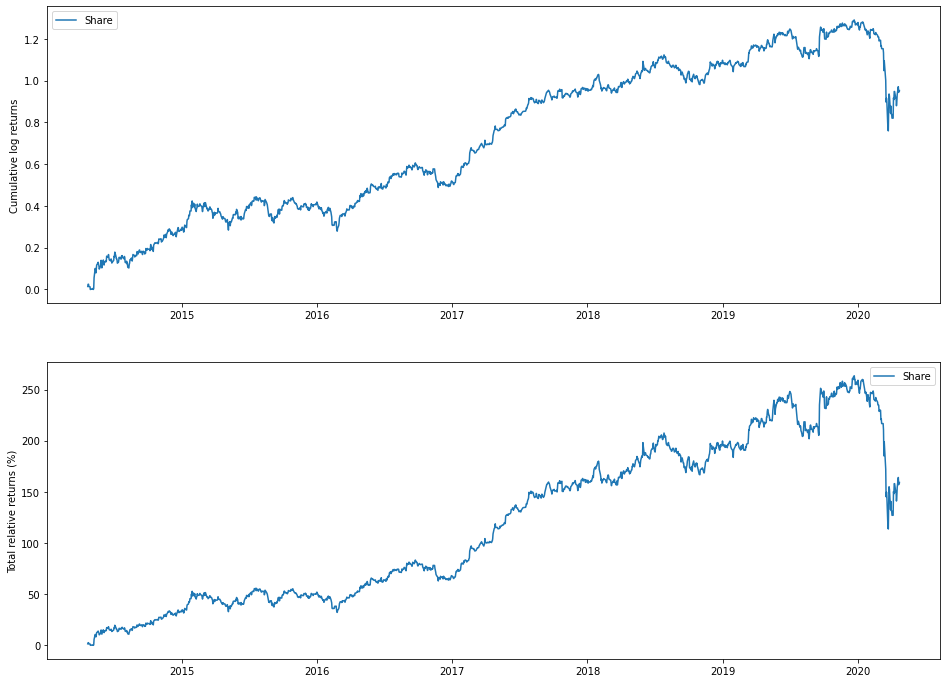

In [0]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

ax1.plot(log_returns.index, log_returns.cumsum(), label="Share")

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best')

ax2.plot(log_returns.index, 100*(np.exp(log_returns.cumsum()) - 1), label="Share")

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

plt.show()

In [0]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

1180

In [0]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[3.70599431e-04],
       [5.53288016e-03],
       [9.71566415e-03],
       ...,
       [6.22703410e-01],
       [5.95965443e-01],
       [6.04066278e-01]])

In [0]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [0]:
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1120, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1120/1120 [==============================] - 309s 276ms/step - loss: 0.0015


In [0]:
#Create the testing data set
#Create a new array containing scaled values
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [0]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

46.08434295500164

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


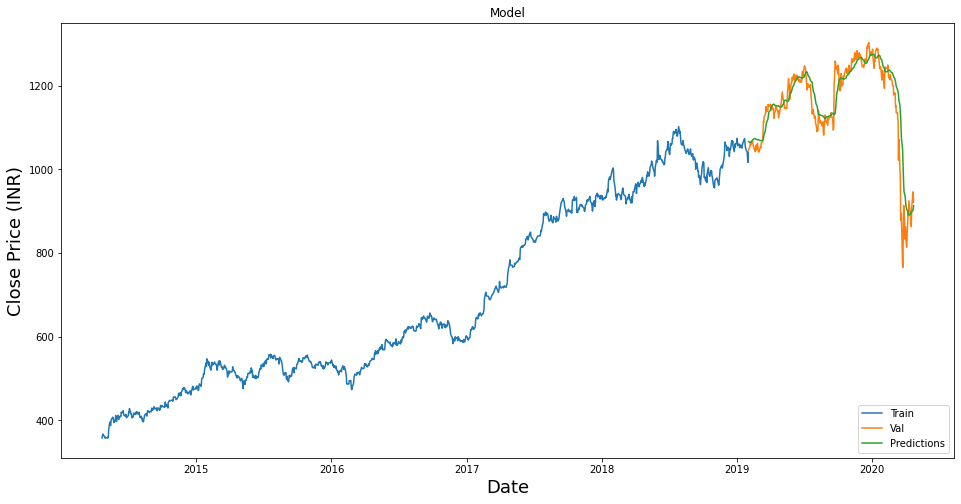

In [0]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (INR)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-02-01,1045.819946,1066.351318
2019-02-04,1053.500000,1064.425171
2019-02-05,1057.449951,1063.633911
2019-02-06,1061.500000,1063.808838
2019-02-07,1058.530029,1064.798340
...,...,...
2020-04-16,881.049988,897.215698
2020-04-17,910.400024,898.592529
2020-04-20,946.000000,901.423584
